Name: Harish Dhinakaran


Student ID: H00365604

Heriot-Watt University, Dubai

### Introduction: 
A machine learning project using Spotify Music Dataset from the Kaggle Database. The dataset consists of 14 features of each track and 2 classes (Hit or Flop), one of which the track will fall under. Different types of machine learning methodologies are experimented throughout this project.

In [68]:
#Importing all Essential Libraries 
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.cm as cm
from plotnine import *
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from scipy import interp
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

## Preprocessing:
The preprocessing done for this data set is very straighforward. The data is first loaded through the means of pandas dataframe and all non-numeric attributes were removed, reducing the number of attributes from 18-14 as they did not serve any purpose in deciding if a track were to become a hit or a flop. The samples size was also reduced to 3000.

In [69]:
#Loading of chosen Dataset
ds = pd.read_csv(r'C:\Users\haris\Dow\dataset-of-10s.csv')

In [70]:
# Removal of non-numeric attributes and reduction of samples size
ds.drop(['artist','uri','track','mode'], axis=1, inplace=True)
ds.drop(ds.tail(3398).index, inplace=True)

# Part 1 - Data Analysis and Bayes Nets
In this stage both bernoulli and gaussian Naive-bayes models were tested on the datasets. Firsty all the target values which were '0' and '1' was replaced to '1' and '2' respectively. The reason for doing this is its similar to one hot encoding but without having to convert it into a numpy array, where hit dataset will have flop values as zero and flop dataset will have hit values as 0. The dataset is also split into training and testing set. Mean and variance normalization was applied to standardize the dataset to give the best possible results, since loudness feature contains negative values.

In [151]:
#Replacing all target values from '1' to '2' for Hit class 
ds.replace(to_replace={'target': {1:2}}, value=None , inplace=True)

In [152]:
#Replacing all target values from '0' to '1' for flop class 
ds.replace(to_replace={'target': {0:1}}, value=None , inplace=True)

In [115]:
print("                                                     General Dataset")
ds

                                                     General Dataset


danceability  energy  key  loudness  speechiness  acousticness  \
0            0.741   0.626    1    -4.826       0.0886      0.020000   
1            0.447   0.247    5   -14.661       0.0346      0.871000   
2            0.550   0.415    9    -6.557       0.0520      0.161000   
3            0.502   0.648    0    -5.698       0.0527      0.005130   
4            0.807   0.887    1    -3.892       0.2750      0.003810   
...            ...     ...  ...       ...          ...           ...   
2995         0.295   0.817    7    -7.594       0.0429      0.039200   
2996         0.684   0.603   11    -8.127       0.0989      0.027500   
2997         0.133   0.017    9   -27.781       0.0361      0.929000   
2998         0.981   0.417   11   -10.732       0.1340      0.047100   
2999         0.320   0.946    0    -0.843       0.0740      0.000077   

      instrumentalness  liveness  valence    tempo  duration_ms  \
0             0.000000    0.0828   0.7060  108.029       188493   
1             0.814000    0.0946   0.2500  155.489       176880   
2             0.000000    0.1080   0.2740  172.065       205463   
3             0.000000    0.2040   0.2910   91.837       193043   
4             0.000000    0.3910   0.7800  160.517       144244   
...                ...       ...      ...      ...          ...   
2995          0.833000    0.3200   0.2760  128.351       456440   
2996          0.000311    0.1910   0.5040   81.000       195373   
2997          0.964000    0.0727   0.0619   95.973       199423   
2998          0.359000    0.1030   0.2620  122.044       129384   
2999          0.000002    0.3110   0.2420  174.954       310855   

      time_signature  chorus_hit  sections  target  
0                  4    41.18681        10       2  
1                  3    33.18083         9       1  
2                  4    44.89147         9       2  
3                  4    29.52521         7       1  
4                  4    24.99199         8       2  
...              ...         ...       ...     ...  
2995               4    86.96359        14       1  
2996               4    26.39306        10       2  
2997               3    49.36190         8       1  
2998               4    30.05854         6       2  
2999               4    49.64540        14       1  

[3000 rows x 15 columns]

In [76]:
# here the general dataset is being split for training and testing purposes, 70% and 30% respectively, then shuffling the samples
from sklearn.model_selection import train_test_split
y = ds['target']
X = ds.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Mean and variance normalization using standard scaler on the training data set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)


                                        GENERAL DATASET PERFORMANCE METRICS


Bernoulli Naive Bayes model

Accuracy Score: 73.111 %
Recall Score: 66.228 %
Precision Score: 77.436 %
F1 Score: 71.395 %
Area under ROC curve: 0.732 
Confusion Matrix:



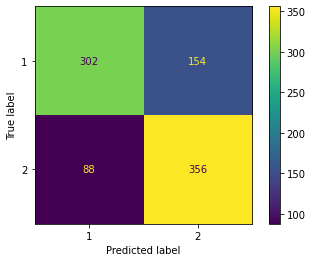

TPR: 0.774 
FPR: 0.302 


Gaussian Naive Bayes model

Accuracy Score: 74.444 %
Recall Score: 57.675 %
Precision Score: 87.667 %
F1 Score: 69.577 %
Area under ROC curve: 0.747 
Confusion Matrix:



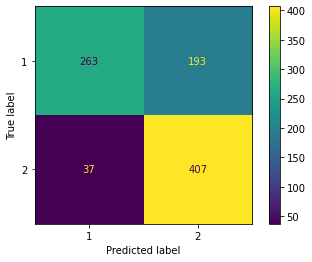

TPR: 0.877 
FPR: 0.322 




In [128]:
# Training the models for general dataset and printing the performance metrics
models = {
    "Bernoulli Naive Bayes model": BernoulliNB(),
    "Gaussian Naive Bayes model": GaussianNB(),
}
print("                                        GENERAL DATASET PERFORMANCE METRICS")
print("")
print("")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print("")
    print("Accuracy Score: " + "{:.3f} %".format(metrics.accuracy_score(y_test, y_pred)*100))
    print("Recall Score: " + "{:.3f} %".format(metrics.recall_score(y_test, y_pred)*100))
    print("Precision Score: " + "{:.3f} %".format(metrics.precision_score(y_test, y_pred)*100))
    print("F1 Score: " + "{:.3f} %".format(metrics.f1_score(y_test, y_pred)*100))
    print("Area under ROC curve: " + "{:.3f} ".format(metrics.roc_auc_score(y_test, y_pred)))
    print("Confusion Matrix:")
    print("")
    plot_confusion_matrix(model, X_test, y_test)  
    plt.show()
    CM = confusion_matrix(y_test, y_pred)
    TN = CM[1][1]
    FN = CM[1][0]
    TP = CM[0][0]
    FP = CM[0][1]
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    print("TPR: " + "{:.3f} ".format(TPR))
    print("FPR: " + "{:.3f} ".format(FPR))
    print("")
    print("")

In [113]:
#Creating a Dataset for finding correlation with features for Hit class
hit = ds.replace(to_replace={'target': {1:0}}, value=None)

In [117]:
#Creating a Dataset for finding correlation with features for flop class
flop = ds.replace(to_replace={'target': {2:0}}, value=None)

In [116]:
hit

danceability  energy  key  loudness  speechiness  acousticness  \
0            0.741   0.626    1    -4.826       0.0886      0.020000   
1            0.447   0.247    5   -14.661       0.0346      0.871000   
2            0.550   0.415    9    -6.557       0.0520      0.161000   
3            0.502   0.648    0    -5.698       0.0527      0.005130   
4            0.807   0.887    1    -3.892       0.2750      0.003810   
...            ...     ...  ...       ...          ...           ...   
2995         0.295   0.817    7    -7.594       0.0429      0.039200   
2996         0.684   0.603   11    -8.127       0.0989      0.027500   
2997         0.133   0.017    9   -27.781       0.0361      0.929000   
2998         0.981   0.417   11   -10.732       0.1340      0.047100   
2999         0.320   0.946    0    -0.843       0.0740      0.000077   

      instrumentalness  liveness  valence    tempo  duration_ms  \
0             0.000000    0.0828   0.7060  108.029       188493   
1             0.814000    0.0946   0.2500  155.489       176880   
2             0.000000    0.1080   0.2740  172.065       205463   
3             0.000000    0.2040   0.2910   91.837       193043   
4             0.000000    0.3910   0.7800  160.517       144244   
...                ...       ...      ...      ...          ...   
2995          0.833000    0.3200   0.2760  128.351       456440   
2996          0.000311    0.1910   0.5040   81.000       195373   
2997          0.964000    0.0727   0.0619   95.973       199423   
2998          0.359000    0.1030   0.2620  122.044       129384   
2999          0.000002    0.3110   0.2420  174.954       310855   

      time_signature  chorus_hit  sections  target  
0                  4    41.18681        10       2  
1                  3    33.18083         9       0  
2                  4    44.89147         9       2  
3                  4    29.52521         7       0  
4                  4    24.99199         8       2  
...              ...         ...       ...     ...  
2995               4    86.96359        14       0  
2996               4    26.39306        10       2  
2997               3    49.36190         8       0  
2998               4    30.05854         6       2  
2999               4    49.64540        14       0  

[3000 rows x 15 columns]

In [118]:
flop

danceability  energy  key  loudness  speechiness  acousticness  \
0            0.741   0.626    1    -4.826       0.0886      0.020000   
1            0.447   0.247    5   -14.661       0.0346      0.871000   
2            0.550   0.415    9    -6.557       0.0520      0.161000   
3            0.502   0.648    0    -5.698       0.0527      0.005130   
4            0.807   0.887    1    -3.892       0.2750      0.003810   
...            ...     ...  ...       ...          ...           ...   
2995         0.295   0.817    7    -7.594       0.0429      0.039200   
2996         0.684   0.603   11    -8.127       0.0989      0.027500   
2997         0.133   0.017    9   -27.781       0.0361      0.929000   
2998         0.981   0.417   11   -10.732       0.1340      0.047100   
2999         0.320   0.946    0    -0.843       0.0740      0.000077   

      instrumentalness  liveness  valence    tempo  duration_ms  \
0             0.000000    0.0828   0.7060  108.029       188493   
1             0.814000    0.0946   0.2500  155.489       176880   
2             0.000000    0.1080   0.2740  172.065       205463   
3             0.000000    0.2040   0.2910   91.837       193043   
4             0.000000    0.3910   0.7800  160.517       144244   
...                ...       ...      ...      ...          ...   
2995          0.833000    0.3200   0.2760  128.351       456440   
2996          0.000311    0.1910   0.5040   81.000       195373   
2997          0.964000    0.0727   0.0619   95.973       199423   
2998          0.359000    0.1030   0.2620  122.044       129384   
2999          0.000002    0.3110   0.2420  174.954       310855   

      time_signature  chorus_hit  sections  target  
0                  4    41.18681        10       0  
1                  3    33.18083         9       1  
2                  4    44.89147         9       0  
3                  4    29.52521         7       1  
4                  4    24.99199         8       0  
...              ...         ...       ...     ...  
2995               4    86.96359        14       1  
2996               4    26.39306        10       0  
2997               3    49.36190         8       1  
2998               4    30.05854         6       0  
2999               4    49.64540        14       1  

[3000 rows x 15 columns]

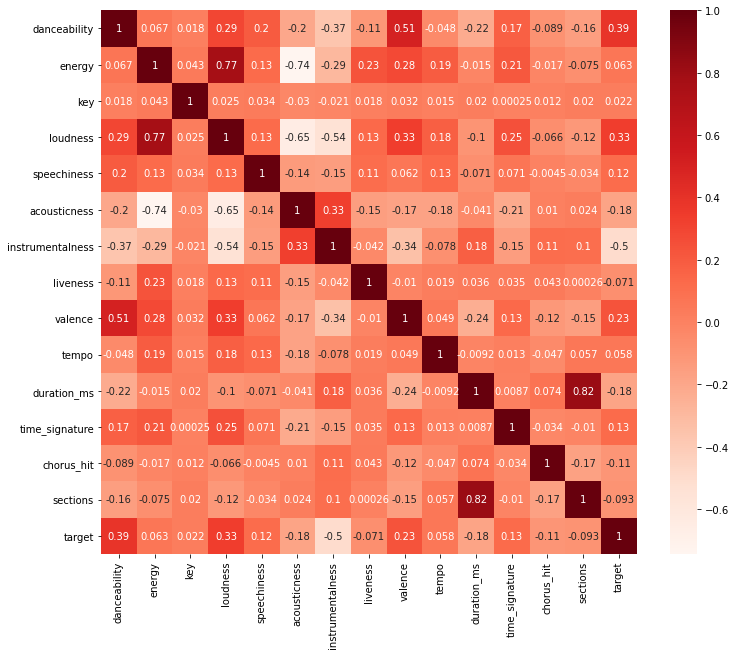

In [112]:
#Finding the general correlation between attributes and class
plt.figure(figsize=(12,10))
correlation = ds.corr()
sns.heatmap(correlation, annot=True, cmap=plt.cm.Reds)
plt.show()

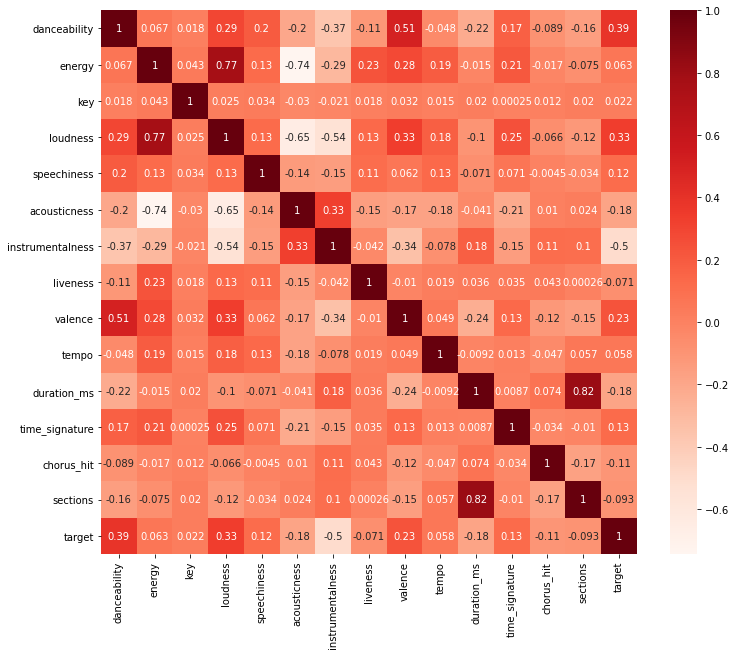

In [119]:
#Finding the best correlating attributes with Hit target Class variable
plt.figure(figsize=(12,10))
correlation = hit.corr()
sns.heatmap(correlation, annot=True, cmap=plt.cm.Reds)
plt.show()

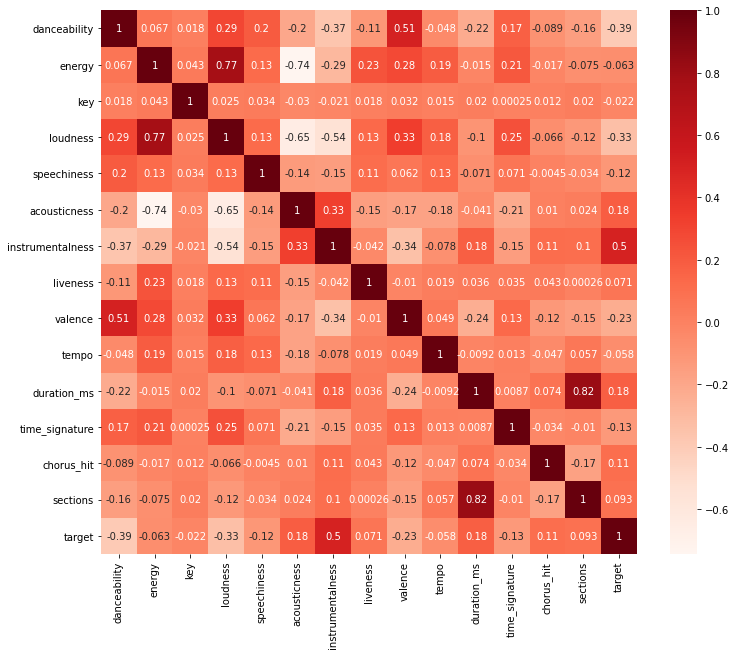

In [120]:
#Finding the best correlating attributes with Flop target class variable
plt.figure(figsize=(12,10))
correlation = flop.corr()
sns.heatmap(correlation, annot=True, cmap=plt.cm.Reds)
plt.show()

In [84]:
#creating dataset 1 with top 2 features from each class
ds1=ds.drop(['energy','key','speechiness','acousticness','liveness','valence','tempo','duration_ms','time_signature', 'chorus_hit', 'sections','loudness'], axis=1)
#creating dataset 2 with top 5 features from each class
ds2=ds.drop(['energy','key','speechiness','liveness','tempo','time_signature', 'chorus_hit', 'sections','acousticness'], axis=1)
#creating dataset 3 with top 10 features from each class
ds3=ds.drop(['energy','key','liveness','tempo'], axis=1)


In [85]:
print("             Dataset 1")
ds1

             Dataset 1


danceability  instrumentalness  target
0            0.741          0.000000       2
1            0.447          0.814000       1
2            0.550          0.000000       2
3            0.502          0.000000       1
4            0.807          0.000000       2
...            ...               ...     ...
2995         0.295          0.833000       1
2996         0.684          0.000311       2
2997         0.133          0.964000       1
2998         0.981          0.359000       2
2999         0.320          0.000002       1

[3000 rows x 3 columns]

In [86]:
# here the dataset 1 is being split for training and testing purposes, 70% and 30% respectively, then shuffling the samples
from sklearn.model_selection import train_test_split
y = ds1['target']
X = ds1.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Mean and variance normalization using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

                                        DATASET 1 PERFORMANCE METRICS


Bernoulli Naive Bayes model

Accuracy Score: 73.556 %
Recall Score: 78.289 %
Precision Score: 71.976 %
F1 Score: 75.000 %
Area under ROC curve: 0.735 
Confusion Matrix:



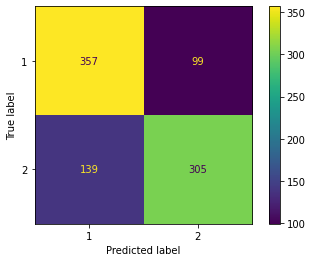

TPR: 0.720 
FPR: 0.245 


Gaussian Naive Bayes model

Accuracy Score: 73.333 %
Recall Score: 49.123 %
Precision Score: 96.552 %
F1 Score: 65.116 %
Area under ROC curve: 0.737 
Confusion Matrix:



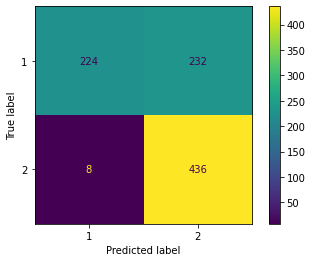

TPR: 0.966 
FPR: 0.347 




In [160]:
#Training the models for dataset 1 and printing the performance metrics
models = {
    "Bernoulli Naive Bayes model": BernoulliNB(),
    "Gaussian Naive Bayes model": GaussianNB(),
}
print("                                        DATASET 1 PERFORMANCE METRICS")
print("")
print("")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print("")
    print("Accuracy Score: " + "{:.3f} %".format(metrics.accuracy_score(y_test, y_pred)*100))
    print("Recall Score: " + "{:.3f} %".format(metrics.recall_score(y_test, y_pred)*100))
    print("Precision Score: " + "{:.3f} %".format(metrics.precision_score(y_test, y_pred)*100))
    print("F1 Score: " + "{:.3f} %".format(metrics.f1_score(y_test, y_pred)*100))
    print("Area under ROC curve: " + "{:.3f} ".format(metrics.roc_auc_score(y_test, y_pred)))
    print("Confusion Matrix:")
    print("")
    plot_confusion_matrix(model, X_test, y_test)  
    plt.show()
    CM = confusion_matrix(y_test, y_pred)
    TN = CM[1][1]
    FN = CM[1][0]
    TP = CM[0][0]
    FP = CM[0][1]
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    print("TPR: " + "{:.3f} ".format(TPR))
    print("FPR: " + "{:.3f} ".format(FPR))
    print("")
    print("")

In [126]:
print("                           dataset 2")
ds2

                           dataset 2


danceability  loudness  instrumentalness  valence  duration_ms  target
0            0.741    -4.826          0.000000   0.7060       188493       2
1            0.447   -14.661          0.814000   0.2500       176880       1
2            0.550    -6.557          0.000000   0.2740       205463       2
3            0.502    -5.698          0.000000   0.2910       193043       1
4            0.807    -3.892          0.000000   0.7800       144244       2
...            ...       ...               ...      ...          ...     ...
2995         0.295    -7.594          0.833000   0.2760       456440       1
2996         0.684    -8.127          0.000311   0.5040       195373       2
2997         0.133   -27.781          0.964000   0.0619       199423       1
2998         0.981   -10.732          0.359000   0.2620       129384       2
2999         0.320    -0.843          0.000002   0.2420       310855       1

[3000 rows x 6 columns]

In [161]:
# here the dataset 2 is being split for training and testing purposes, 70% and 30% respectively, then shuffling the samples
from sklearn.model_selection import train_test_split
y = ds2['target']
X = ds2.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Mean and variance normalization using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

                                        DATASET 2 PERFORMANCE METRICS


Bernoulli Naive Bayes model

Accuracy Score: 74.000 %
Recall Score: 63.596 %
Precision Score: 81.006 %
F1 Score: 71.253 %
Area under ROC curve: 0.741 
Confusion Matrix:



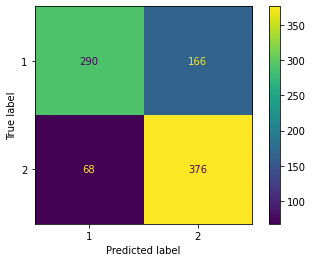

TPR: 0.810 
FPR: 0.306 


Gaussian Naive Bayes model

Accuracy Score: 74.556 %
Recall Score: 53.947 %
Precision Score: 92.830 %
F1 Score: 68.239 %
Area under ROC curve: 0.748 
Confusion Matrix:



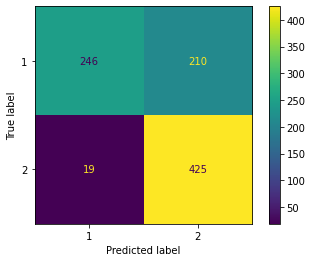

TPR: 0.928 
FPR: 0.331 




In [162]:
#Training the models for dataset 2 and printing the performance metrics
models = {
    "Bernoulli Naive Bayes model": BernoulliNB(),
    "Gaussian Naive Bayes model": GaussianNB(),
}
print("                                        DATASET 2 PERFORMANCE METRICS")
print("")
print("")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print("")
    print("Accuracy Score: " + "{:.3f} %".format(metrics.accuracy_score(y_test, y_pred)*100))
    print("Recall Score: " + "{:.3f} %".format(metrics.recall_score(y_test, y_pred)*100))
    print("Precision Score: " + "{:.3f} %".format(metrics.precision_score(y_test, y_pred)*100))
    print("F1 Score: " + "{:.3f} %".format(metrics.f1_score(y_test, y_pred)*100))
    print("Area under ROC curve: " + "{:.3f} ".format(metrics.roc_auc_score(y_test, y_pred)))
    print("Confusion Matrix:")
    print("")
    plot_confusion_matrix(model, X_test, y_test)  
    plt.show()
    CM = confusion_matrix(y_test, y_pred)
    TN = CM[1][1]
    FN = CM[1][0]
    TP = CM[0][0]
    FP = CM[0][1]
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    print("TPR: " + "{:.3f} ".format(TPR))
    print("FPR: " + "{:.3f} ".format(FPR))
    print("")
    print("")

In [129]:
print("                                                       Dataset 3")
ds3

                                                       Dataset 3


danceability  loudness  speechiness  acousticness  instrumentalness  \
0            0.741    -4.826       0.0886      0.020000          0.000000   
1            0.447   -14.661       0.0346      0.871000          0.814000   
2            0.550    -6.557       0.0520      0.161000          0.000000   
3            0.502    -5.698       0.0527      0.005130          0.000000   
4            0.807    -3.892       0.2750      0.003810          0.000000   
...            ...       ...          ...           ...               ...   
2995         0.295    -7.594       0.0429      0.039200          0.833000   
2996         0.684    -8.127       0.0989      0.027500          0.000311   
2997         0.133   -27.781       0.0361      0.929000          0.964000   
2998         0.981   -10.732       0.1340      0.047100          0.359000   
2999         0.320    -0.843       0.0740      0.000077          0.000002   

      valence  duration_ms  time_signature  chorus_hit  sections  target  
0      0.7060       188493               4    41.18681        10       2  
1      0.2500       176880               3    33.18083         9       1  
2      0.2740       205463               4    44.89147         9       2  
3      0.2910       193043               4    29.52521         7       1  
4      0.7800       144244               4    24.99199         8       2  
...       ...          ...             ...         ...       ...     ...  
2995   0.2760       456440               4    86.96359        14       1  
2996   0.5040       195373               4    26.39306        10       2  
2997   0.0619       199423               3    49.36190         8       1  
2998   0.2620       129384               4    30.05854         6       2  
2999   0.2420       310855               4    49.64540        14       1  

[3000 rows x 11 columns]

In [165]:
# here the dataset 3 is being split for training and testing purposes, 70% and 30% respectively, then shuffling the samples
from sklearn.model_selection import train_test_split
y = ds3['target']
X = ds3.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Mean and variance normalization using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

                                        DATASET 3 PERFORMANCE METRICS


Bernoulli Naive Bayes model

Accuracy Score: 73.111 %
Recall Score: 66.009 %
Precision Score: 77.577 %
F1 Score: 71.327 %
Area under ROC curve: 0.732 
Confusion Matrix:



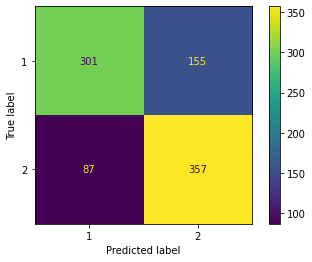

TPR: 0.776 
FPR: 0.303 


Gaussian Naive Bayes model

Accuracy Score: 73.444 %
Recall Score: 55.482 %
Precision Score: 87.543 %
F1 Score: 67.919 %
Area under ROC curve: 0.737 
Confusion Matrix:



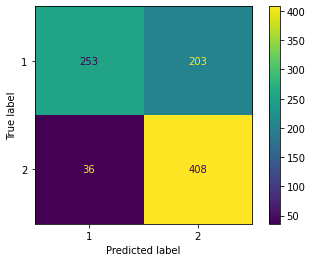

TPR: 0.875 
FPR: 0.332 




In [166]:
#Training the models for dataset 3 and printing the performance metrics
models = {
    "Bernoulli Naive Bayes model": BernoulliNB(),
    "Gaussian Naive Bayes model": GaussianNB(),
}
print("                                        DATASET 3 PERFORMANCE METRICS")
print("")
print("")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print("")
    print("Accuracy Score: " + "{:.3f} %".format(metrics.accuracy_score(y_test, y_pred)*100))
    print("Recall Score: " + "{:.3f} %".format(metrics.recall_score(y_test, y_pred)*100))
    print("Precision Score: " + "{:.3f} %".format(metrics.precision_score(y_test, y_pred)*100))
    print("F1 Score: " + "{:.3f} %".format(metrics.f1_score(y_test, y_pred)*100))
    print("Area under ROC curve: " + "{:.3f} ".format(metrics.roc_auc_score(y_test, y_pred)))
    print("Confusion Matrix:")
    print("")
    plot_confusion_matrix(model, X_test, y_test)  
    plt.show()
    CM = confusion_matrix(y_test, y_pred)
    TN = CM[1][1]
    FN = CM[1][0]
    TP = CM[0][0]
    FP = CM[0][1]
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    print("TPR: " + "{:.3f} ".format(TPR))
    print("FPR: " + "{:.3f} ".format(FPR))
    print("")
    print("")

Overall, I would like to conclude that Dataset 2 performed the best among all considering the performance metrics for both the Naïve Bayesian models. The features for a track that helped give the best results were Danceability, Loudness, Valence, Instrumentalness and the Duration of track. In general tracks with higher danceability (that is the ability to dance to it), loudness (in terms of decibels) and valence (higher the valence the happier and more euphoric the track sounds) were liked by the audience. Whereas instrumentalness and the duration of the track played an important role in determining if the track was disliked, as the audience in general disliked tracks that had no vocals and were long in length.


# Part 2 - Clustering
In this stage of the coursework, I have implemented Clustering methods to the existing dataset. For pre-processing since we are only going to need clustering labels and not doing any sort of classification, the target variable will be dropped from the dataset. Z scaling was applied to the dataset to get a better visual of the plot and the top two features were selected from the previous stage to be used in this stage as well. We will investigate how number of clusters and clustering models play an important role in the performance of clustering. The silhouette score is being used here as a metric for measuring the classification accuracy of the clustering model.

                    General Visualization of the particles density before clustering


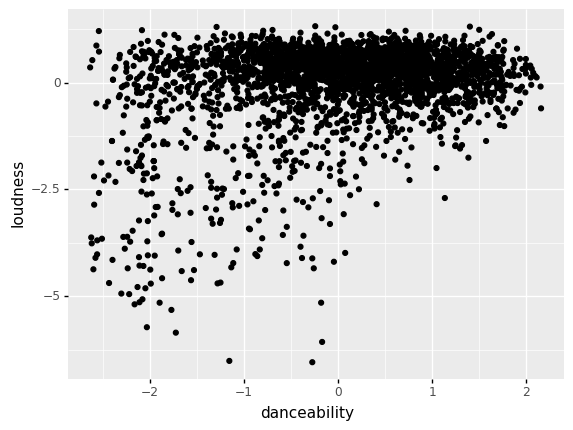

<ggplot: (141531150978)>

In [254]:
#feature selection for clustering and z scaling 
features = ["danceability", "loudness"]
X= ds[features]
from sklearn.preprocessing import StandardScaler
z= StandardScaler()
X[features]=z.fit_transform(X)
print("                    General Visualization of the particles density before clustering")
(ggplot(X, aes("danceability","loudness")) + geom_point())

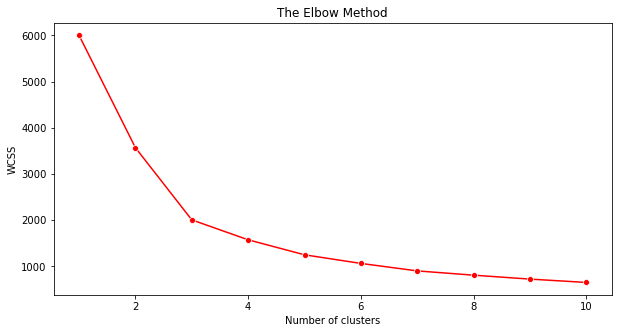

In [108]:
#Using the elbow method to find optimal no of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()    

In [234]:
#Using the Silhouette method to find the optimal no. of clusters
print("                            The Silhouette Method")
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

                            The Silhouette Method
For n_clusters = 2, silhouette score is 0.6022901825758944)
For n_clusters = 3, silhouette score is 0.5638526631846402)
For n_clusters = 4, silhouette score is 0.5961511542255699)
For n_clusters = 5, silhouette score is 0.5979616288034878)
For n_clusters = 6, silhouette score is 0.5136398092279308)
For n_clusters = 7, silhouette score is 0.47896228429416504)
For n_clusters = 8, silhouette score is 0.41058482397466983)
For n_clusters = 9, silhouette score is 0.40537000026352416)
For n_clusters = 10, silhouette score is 0.4022684329436409)


Using the combination of results found from elbow method and silhouette method, we can further test out results of k-means clustering with n =3,4,5.

                                   K Means Clustering Model with n=3
Accuracy Score: 56.385 %


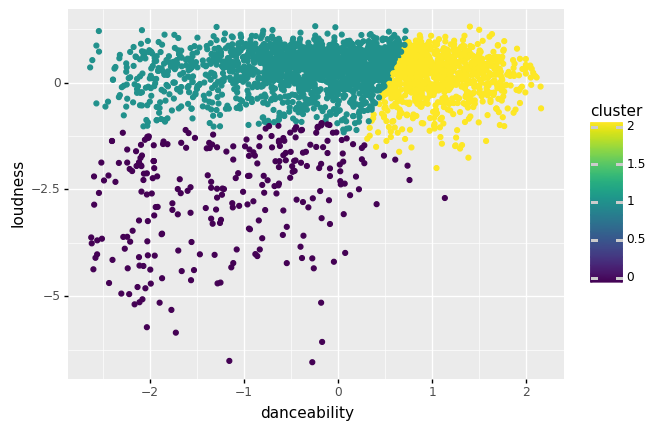

<ggplot: (163232275002)>

In [235]:
model=KMeans(n_clusters=3)
model.fit(X)
cluster=model.predict(X)
print("                                   K Means Clustering Model with n=3")
print("Accuracy Score: " + "{:.3f} %".format(metrics.silhouette_score(X, cluster)*100))
X["cluster"]= cluster
(ggplot(X, aes("danceability","loudness", color = "cluster")) + geom_point())

                                   K Means Clustering Model with n=4
Accuracy Score: 59.913 %


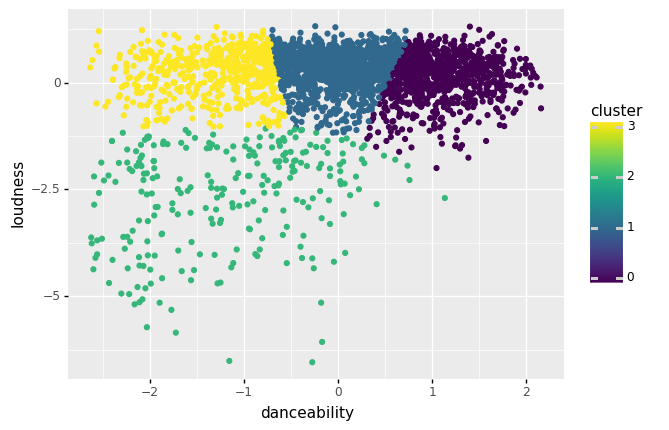

<ggplot: (163232213441)>

In [238]:
model=KMeans(n_clusters=4)
model.fit(X)
cluster=model.predict(X)
print("                                   K Means Clustering Model with n=4")
print("Accuracy Score: " + "{:.3f} %".format(metrics.silhouette_score(X, cluster)*100))
X["cluster"]= cluster
(ggplot(X, aes("danceability","loudness", color = "cluster")) + geom_point())

                                   K Means Clustering Model with n=5
Accuracy Score: 60.889 %


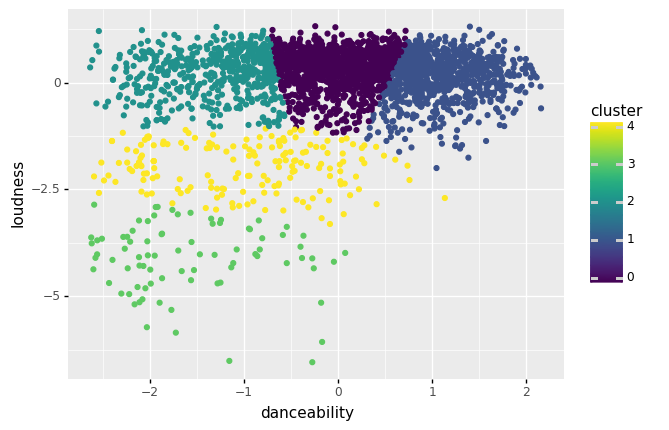

<ggplot: (163230182476)>

In [241]:
model=KMeans(n_clusters=5)
model.fit(X)
cluster=model.predict(X)
print("                                   K Means Clustering Model with n=5")
print("Accuracy Score: " + "{:.3f} %".format(metrics.silhouette_score(X, cluster)*100))
X["cluster"]= cluster
(ggplot(X, aes("danceability","loudness", color = "cluster")) + geom_point())

Accuracy Score: 52.232 %


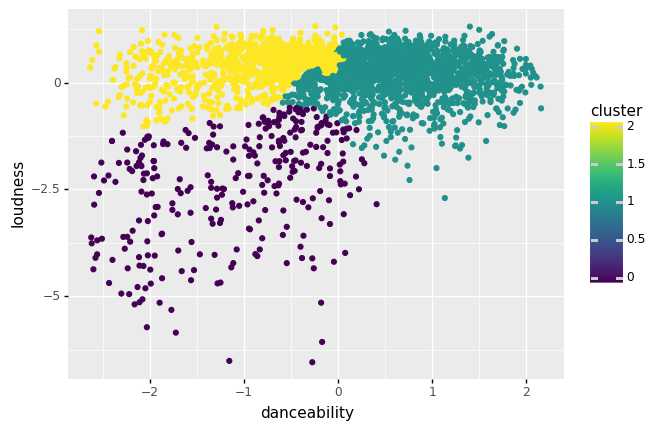

<ggplot: (141530853063)>

In [257]:
# Fitting Hierarchical Agglomerative clustering(HAC) model on dataset
model = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
model.fit(X)
cluster = model.labels_
print("Accuracy Score: " + "{:.3f} %".format(metrics.silhouette_score(X, cluster)*100))
X["cluster"]= cluster
(ggplot(X, aes("danceability","loudness", color = "cluster")) + geom_point())

From the results that were got, the k-means clustering with n=5 performed the best, therefore the silhouette analysis proved to be a very good technique in finding the optimal no. of clusters. In general the clustering accuray(silhouette score) was not upto the mark, so for this particular dataset a better means of clustering or a better feature selection needs to be done, as there is a lot of overlap formed in the clusters, leading to a poor classification accuracy. Hierarchical Agglomerative clustering was also tested and performer poorly as well.

# Part 3 - Supervised Learning: Generalisation & Overfitting; Decision trees
This stage involved the most number of experimentation and other complex methods. First the Decision tree classifier is trained using the training set and stratified 10 fold validation is applied, later it is tested with a regular train/test split. We the investigate about the classifiers over-fitting.

In [195]:
# here the dataset is being split for training and testing purposes, 70% and 30% respectively, then shuffling the samples
from sklearn.model_selection import train_test_split
y = ds['target']
X = ds.drop('target', axis=1)
feature_names = ds.drop("target",axis=1).columns
class_names = ['hit','flop']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Mean and variance normalization using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)


                                       Decision Tree Classifier with Stratified 10 fold cross validation


Performance Metrics:

Mean Accuracy Score: 77.190 %
Mean Recall Score: 75.465 %
Mean Precision Score: 76.665 %
Mean F1 Score: 75.692 %


The ROC area, TP rate and FP rate



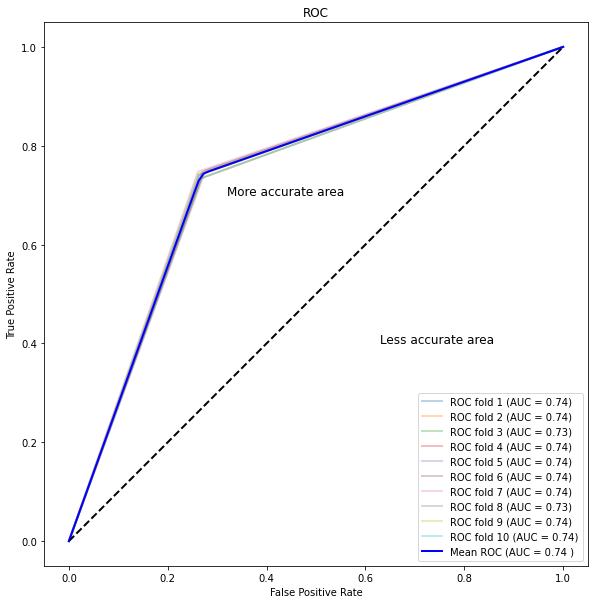

In [78]:
#Training the Decision tree classifier using training set and applying Stratified 10 fold cross validation 
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
model = DecisionTreeClassifier()
print("                                       Decision Tree Classifier with Stratified 10 fold cross validation")
print("")
print("")
print("Performance Metrics:")
print("")
print("Mean Accuracy Score: " + "{:.3f} %".format((cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)).mean()*100))
print("Mean Recall Score: " + "{:.3f} %".format((cross_val_score(model, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1)).mean()*100))
print("Mean Precision Score: " + "{:.3f} %".format((cross_val_score(model, X_train, y_train, scoring='precision', cv=cv, n_jobs=-1)).mean()*100))
print("Mean F1 Score: " + "{:.3f} %".format((cross_val_score(model, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)).mean()*100))
print("")
print("")
print("The ROC area, TP rate and FP rate")
print("")
fig1 = plt.figure(figsize=[10,10])
ax1 = fig1.add_subplot(111,aspect = 'equal')
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X_train,y_train):
    prediction = model.fit(X_train,y_train).predict_proba(X_test)
    fpr, tpr, t = roc_curve(y_test, prediction[:,1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

                                        Decision Tree Classifier 



Accuracy Score: 74.000 %
Recall Score: 73.874 %
Precision Score: 73.543 %
F1 Score: 73.708 %
Area under ROC curve: 0.740 
Confusion Matrix:



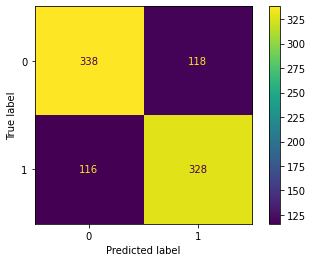

TPR: 0.744 
FPR: 0.265 




In [153]:
#Decision tree classifier using train/test split and printing the performance metrics
feature_names = ds.drop("target",axis=1).columns
class_names = ['hit','flop']
#The classifier Parameters were left to default to first get an initial permformance analysis, no pruning is done here
model = DecisionTreeClassifier(criterion='gini', max_depth=None,
                                min_samples_leaf=1, min_samples_split=2, random_state=None, splitter='best')
print("                                        Decision Tree Classifier ")
print("")
print("")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("")
print("Accuracy Score: " + "{:.3f} %".format(metrics.accuracy_score(y_test, y_pred)*100))
print("Recall Score: " + "{:.3f} %".format(metrics.recall_score(y_test, y_pred)*100))
print("Precision Score: " + "{:.3f} %".format(metrics.precision_score(y_test, y_pred)*100))
print("F1 Score: " + "{:.3f} %".format(metrics.f1_score(y_test, y_pred)*100))
print("Area under ROC curve: " + "{:.3f} ".format(metrics.roc_auc_score(y_test, y_pred)))
print("Confusion Matrix:")
print("")
plot_confusion_matrix(model, X_test, y_test)  
plt.show()
CM = confusion_matrix(y_test, y_pred)
TN = CM[1][1]
FN = CM[1][0]
TP = CM[0][0]
FP = CM[0][1]
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("TPR: " + "{:.3f} ".format(TPR))
print("FPR: " + "{:.3f} ".format(FPR))
print("")
print("")
plt.figure(figsize=(15,6), dpi=1000)
plot_tree(model,feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

Clearly from the above results we find that the classifier performed well with cross validation, but performed slighlty less better as soon as it was subjected to a testing set. This is a sign of over-fitting of the classifier. Let us now investigate how tuning the decision tree parameters helps, as from the figure above we see how complex the structure of the tree is with a max_depth size of 21, while setting all the parameters to default.

In [154]:
#Finding the present max depth of the decision tree
max_depth = model.get_depth()
max_depth

21

In [155]:
#Finding the maximum dpeth value needed to implement the Decision Tree classifier
max_depth_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), scoring='accuracy', 
                        param_grid=ParameterGrid({"max_depth": [[max_depth] for max_depth in range(1, max_depth + 1)]}))
max_depth_grid_search.fit(X_train, y_train)
max_depth_grid_search.best_params_

{'max_depth': 7}

In [125]:
#Pruning the decision tree using cost complexity parameter alphas
ccp_alphas = model.cost_complexity_pruning_path(X_train, y_train)["ccp_alphas"]
ccp_alphas

array([0.        , 0.00095238, 0.00131185, 0.00131185, 0.00131185,
       0.00156522, 0.00166041, 0.00173903, 0.00177521, 0.00185721,
       0.00205322, 0.00215484, 0.00216415, 0.00224259, 0.00227507,
       0.00229467, 0.00230213, 0.00235125, 0.00244817, 0.0024875 ,
       0.0024875 , 0.00259887, 0.00260674, 0.0028376 , 0.00307635,
       0.0032715 , 0.00330787, 0.00340349, 0.00344165, 0.00359183,
       0.00375499, 0.00395146, 0.00439417, 0.00457102, 0.00473472,
       0.00500088, 0.00522001, 0.00596628, 0.0061233 , 0.00626851,
       0.00637468, 0.00669226, 0.0076254 , 0.00811636, 0.01171254,
       0.01421579, 0.01477652, 0.02110369, 0.0243308 , 0.04011286,
       0.28461953])

In [126]:
#Finding the best cost complexity parameter 
ccp_alpha_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                                     scoring='accuracy',
                                     param_grid=ParameterGrid({"ccp_alpha": [[alpha] for alpha in ccp_alphas]}))
ccp_alpha_grid_search.fit(X_train, y_train)
ccp_alpha_grid_search.best_params_

{'ccp_alpha': 0.0035918345927535775}

                                        Decision Tree Classifier with Pruning and best Max Depth 



Accuracy Score: 77.111 %
Recall Score: 79.279 %
Precision Score: 75.536 %
F1 Score: 77.363 %
Area under ROC curve: 0.771 
Confusion Matrix:



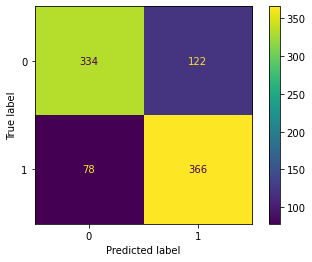

TPR: 0.788 
FPR: 0.245 




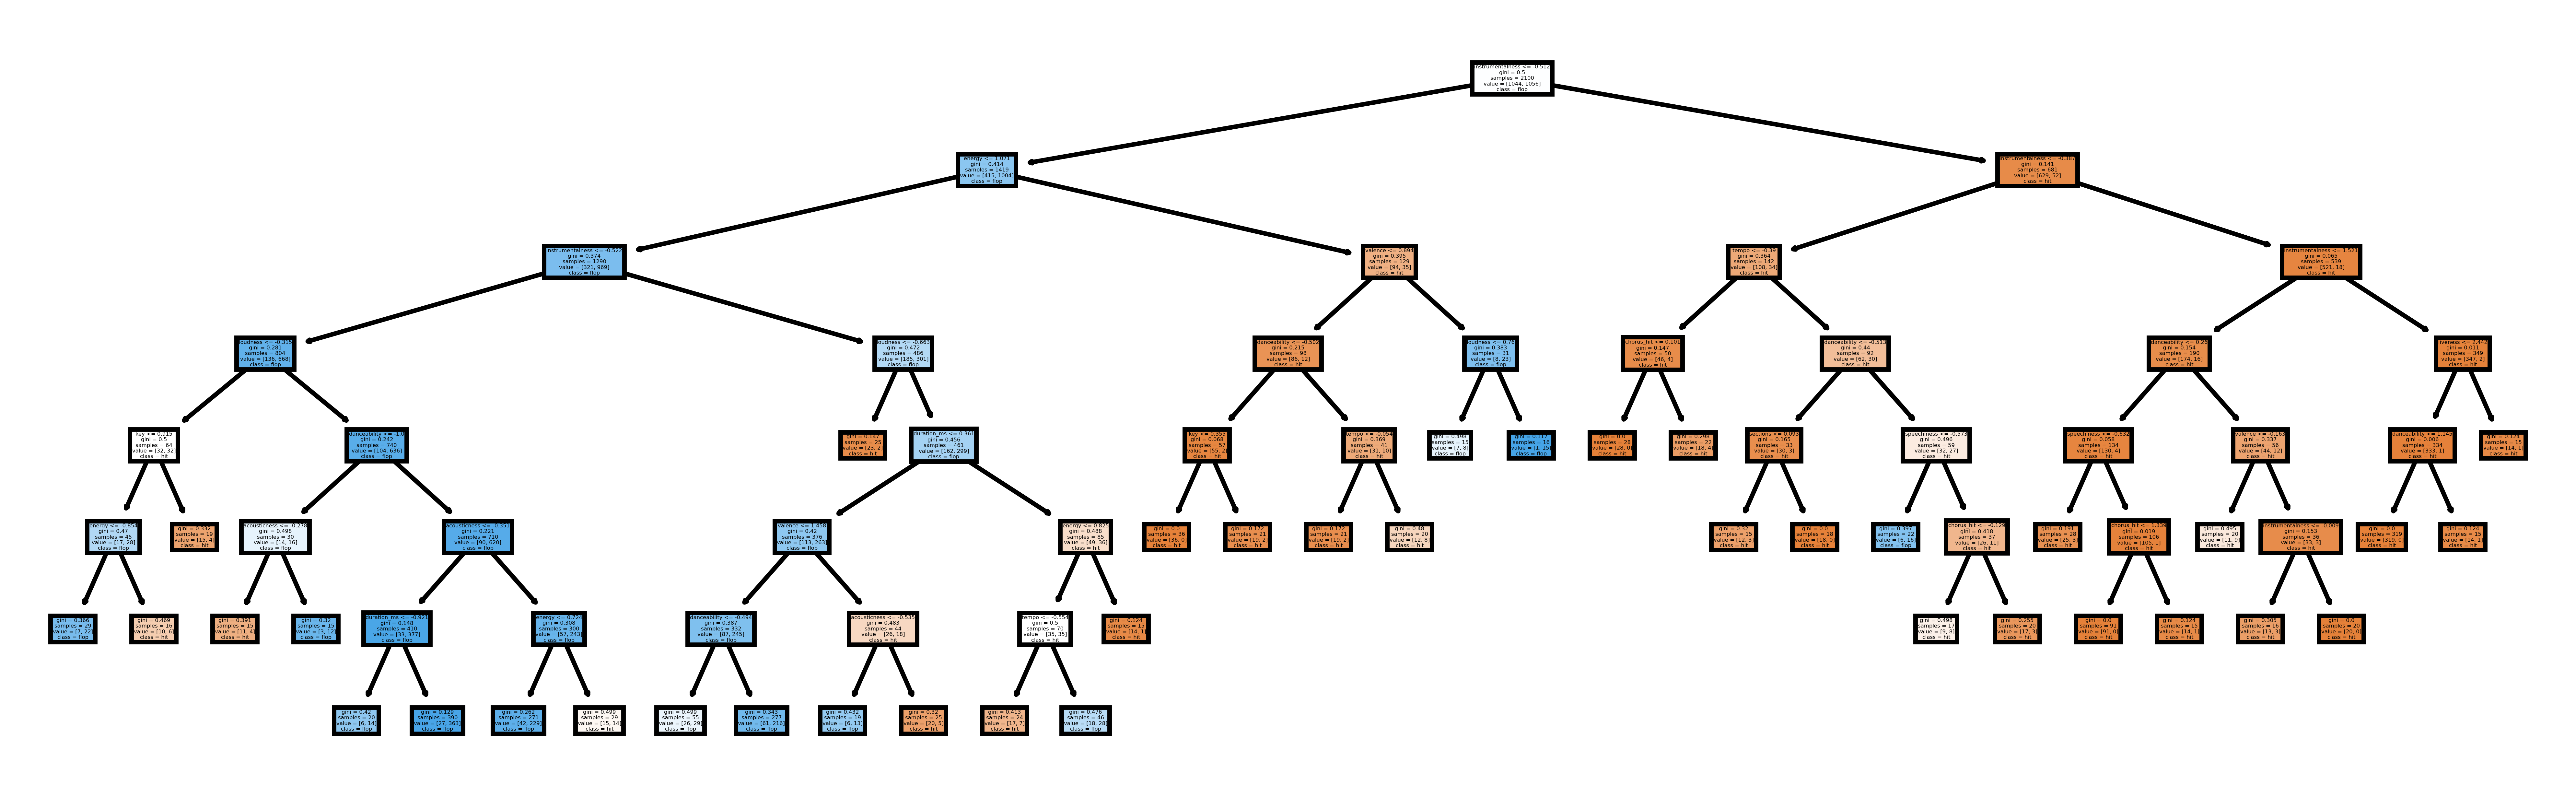

In [179]:
#Decision tree classifier using train/test split and printing the performance metrics
feature_names = ds.drop("target",axis=1).columns
class_names = ['hit','flop']
#The classifier Parameters were updated from the best results and ccp alpha is applied to the y predictions
best_ccp_alpha_tree = ccp_alpha_grid_search.best_estimator_
model = DecisionTreeClassifier(criterion='gini', max_depth=7,min_samples_split=2 ,
                                min_samples_leaf=1, random_state=None, splitter='best')
print("                                        Decision Tree Classifier with Pruning and best Max Depth ")
print("")
print("")
model.fit(X_train, y_train)
y_pred = best_ccp_alpha_tree.predict(X_test) 
print("")
print("Accuracy Score: " + "{:.3f} %".format(metrics.accuracy_score(y_test, y_pred)*100))
print("Recall Score: " + "{:.3f} %".format(metrics.recall_score(y_test, y_pred)*100))
print("Precision Score: " + "{:.3f} %".format(metrics.precision_score(y_test, y_pred)*100))
print("F1 Score: " + "{:.3f} %".format(metrics.f1_score(y_test, y_pred)*100))
print("Area under ROC curve: " + "{:.3f} ".format(metrics.roc_auc_score(y_test, y_pred)))
print("Confusion Matrix:")
print("")
plot_confusion_matrix(model, X_test, y_test)  
plt.show()
CM = confusion_matrix(y_test, y_pred)
TN = CM[1][1]
FN = CM[1][0]
TP = CM[0][0]
FP = CM[0][1]
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("TPR: " + "{:.3f} ".format(TPR))
print("FPR: " + "{:.3f} ".format(FPR))
print("")
print("")
plt.figure(figsize=(10,3), dpi=1000)
plot_tree(model,feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

The GridSearchCV was used to find the best Max_depth size for the Decision tree and the best cos complexity parameter (alpha) which is used for pruning the tree. From the results the classifier performed as well as the crossvalidation method inspite of being tested on a testing set. The overall complexity of the tree was also minimized as max depth reduced from 21 to 7, therefore reducing the running time as well. So pruning and parameter tuning are effective in improving the classifiers performance while tackling over-fitting issues. Next 30% and 60% of the instances are moved from the training set to the testing set, and the classifier is tested respectively, while including the best parameters from the previous experiments.

In [182]:
#Here 30% of the instances from the original training set is moved to the testing set
from sklearn.model_selection import train_test_split
y = ds['target']
X = ds.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.49, shuffle=True, random_state=1)

# Mean and variance normalization using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

                      Decision Tree Classifier with best parameters and 30% moved from original training set 



Accuracy Score: 74.967 %
Recall Score: 69.894 %
Precision Score: 77.160 %
F1 Score: 73.347 %
Area under ROC curve: 0.749 
Confusion Matrix:



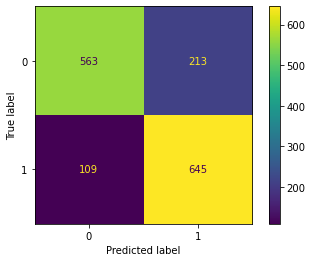

TPR: 0.732 
FPR: 0.228 




In [188]:
best_ccp_alpha_tree = ccp_alpha_grid_search.best_estimator_
model = DecisionTreeClassifier(criterion='gini', max_depth=7,min_samples_split=2,
                                min_samples_leaf=1, random_state=None, splitter='best')
print("                      Decision Tree Classifier with best parameters and 30% moved from original training set ")
print("")
print("")
model.fit(X_train, y_train)
y_pred = best_ccp_alpha_tree.predict(X_test) 
print("")
print("Accuracy Score: " + "{:.3f} %".format(metrics.accuracy_score(y_test, y_pred)*100))
print("Recall Score: " + "{:.3f} %".format(metrics.recall_score(y_test, y_pred)*100))
print("Precision Score: " + "{:.3f} %".format(metrics.precision_score(y_test, y_pred)*100))
print("F1 Score: " + "{:.3f} %".format(metrics.f1_score(y_test, y_pred)*100))
print("Area under ROC curve: " + "{:.3f} ".format(metrics.roc_auc_score(y_test, y_pred)))
print("Confusion Matrix:")
print("")
plot_confusion_matrix(model, X_test, y_test)  
plt.show()
CM = confusion_matrix(y_test, y_pred)
TN = CM[1][1]
FN = CM[1][0]
TP = CM[0][0]
FP = CM[0][1]
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("TPR: " + "{:.3f} ".format(TPR))
print("FPR: " + "{:.3f} ".format(FPR))
print("")
print("")

In [190]:
#Here 60% of the instances from the original training set is moved to the testing set
from sklearn.model_selection import train_test_split
y = ds['target']
X = ds.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.28, shuffle=True, random_state=1)

# Mean and variance normalization using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

                      Decision Tree Classifier with best parameters and 60% moved from original training set 



Accuracy Score: 75.787 %
Recall Score: 68.224 %
Precision Score: 79.956 %
F1 Score: 73.626 %
Area under ROC curve: 0.757 
Confusion Matrix:



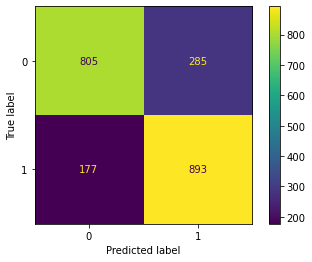

TPR: 0.727 
FPR: 0.200 




In [191]:
best_ccp_alpha_tree = ccp_alpha_grid_search.best_estimator_
model = DecisionTreeClassifier(criterion='gini', max_depth=7,min_samples_split=2,
                                min_samples_leaf=1, random_state=None, splitter='best')
print("                      Decision Tree Classifier with best parameters and 60% moved from original training set ")
print("")
print("")
model.fit(X_train, y_train)
y_pred = best_ccp_alpha_tree.predict(X_test) 
print("")
print("Accuracy Score: " + "{:.3f} %".format(metrics.accuracy_score(y_test, y_pred)*100))
print("Recall Score: " + "{:.3f} %".format(metrics.recall_score(y_test, y_pred)*100))
print("Precision Score: " + "{:.3f} %".format(metrics.precision_score(y_test, y_pred)*100))
print("F1 Score: " + "{:.3f} %".format(metrics.f1_score(y_test, y_pred)*100))
print("Area under ROC curve: " + "{:.3f} ".format(metrics.roc_auc_score(y_test, y_pred)))
print("Confusion Matrix:")
print("")
plot_confusion_matrix(model, X_test, y_test)  
plt.show()
CM = confusion_matrix(y_test, y_pred)
TN = CM[1][1]
FN = CM[1][0]
TP = CM[0][0]
FP = CM[0][1]
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("TPR: " + "{:.3f} ".format(TPR))
print("FPR: " + "{:.3f} ".format(FPR))
print("")
print("")

In [ ]:
# here the dataset is being split for training and testing purposes, 70% and 30% respectively, then shuffling the samples
from sklearn.model_selection import train_test_split
y = ds['target']
X = ds.drop('target', axis=1)
feature_names = ds.drop("target",axis=1).columns
class_names = ['hit','flop']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Mean and variance normalization using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)


                                        Random Forest Classifier 


Performance Metrics


Accuracy Score: 81.333 %
Recall Score: 86.261 %
Precision Score: 78.163 %
F1 Score: 82.013 %
Area under ROC curve: 0.814 
Confusion Matrix:



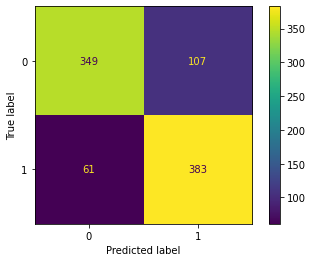

TPR: 0.851 
FPR: 0.218 




In [199]:
feature_names = ds.drop("target",axis=1).columns
class_names = ['hit','flop']
model = RandomForestClassifier(n_estimators=100)
print("                                        Random Forest Classifier ")
print("")
print("")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Performance Metrics")
print("")
print("")
print("Accuracy Score: " + "{:.3f} %".format(metrics.accuracy_score(y_test, y_pred)*100))
print("Recall Score: " + "{:.3f} %".format(metrics.recall_score(y_test, y_pred)*100))
print("Precision Score: " + "{:.3f} %".format(metrics.precision_score(y_test, y_pred)*100))
print("F1 Score: " + "{:.3f} %".format(metrics.f1_score(y_test, y_pred)*100))
print("Area under ROC curve: " + "{:.3f} ".format(metrics.roc_auc_score(y_test, y_pred)))
print("Confusion Matrix:")
print("")
plot_confusion_matrix(model, X_test, y_test)  
plt.show()
CM = confusion_matrix(y_test, y_pred)
TN = CM[1][1]
FN = CM[1][0]
TP = CM[0][0]
FP = CM[0][1]
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("TPR: " + "{:.3f} ".format(TPR))
print("FPR: " + "{:.3f} ".format(FPR))
print("")
print("")

After running the deision tree classifier with 30% and 60% instances moved, we noticed the accuracy reduced but not to a major extent, this means that the pruning and parameter tuning are very effective in reducing over fitting and helping the classifier generalize to new data. Random forest classifier was also tested on the dataset with regular train/test split and performed really well. Decision trees run the risk of overfitting as they tend to tightly fit all the samples within training data. However, when there’s a robust number of decision trees in a random forest, the classifier won’t overfit the model since the averaging of uncorrelated trees lowers the overall variance and prediction error.

# Part 4 - Neural Networks and Convolutional Neural Networks
For this stage the linear classifier that I have chosen is logistic regression model. First we're testing the classifier with and without k-fold cross validation, then with regular train/test split.

In [23]:
# here the general dataset is being split for training and testing purposes, 70% and 30% respectively, then shuffling the samples
from sklearn.model_selection import train_test_split
y = ds['target']
X = ds.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Mean and variance normalization using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

                              Logistic Regression Model with Stratified 10 fold cross validation


Performance Metrics:

Mean Accuracy Score: 80.619 %
Mean Recall Score: 89.493 %
Mean Precision Score: 76.177 %
Mean F1 Score: 82.281 %


The ROC area, TP rate and FP rate



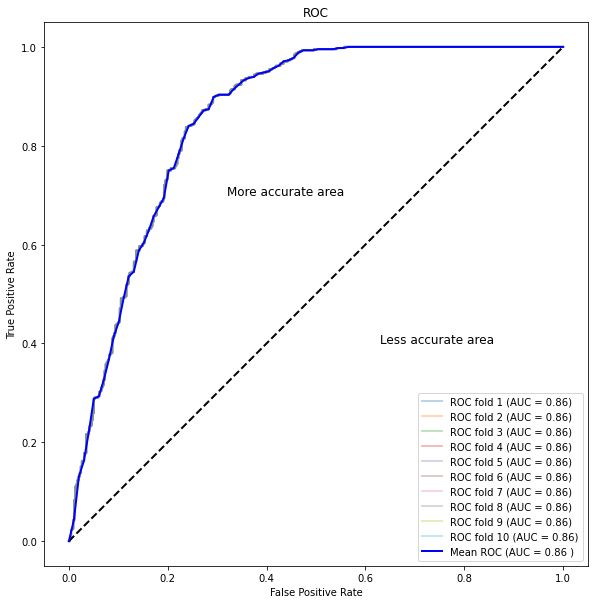

In [29]:
#Training the Linear Classifier using training set and applying Stratified 10 fold cross validation to it
#For the linear classifier LogisticRegression model is chosen as this is a classification problem, therefore we need the ouput to be discrete and not continuous
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
model = LogisticRegression()
print("                              Logistic Regression Model with Stratified 10 fold cross validation")
print("")
print("")
print("Performance Metrics:")
print("")
print("Mean Accuracy Score: " + "{:.3f} %".format((cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)).mean()*100))
print("Mean Recall Score: " + "{:.3f} %".format((cross_val_score(model, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1)).mean()*100))
print("Mean Precision Score: " + "{:.3f} %".format((cross_val_score(model, X_train, y_train, scoring='precision', cv=cv, n_jobs=-1)).mean()*100))
print("Mean F1 Score: " + "{:.3f} %".format((cross_val_score(model, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)).mean()*100))
print("")
print("")
print("The ROC area, TP rate and FP rate")
print("")
fig1 = plt.figure(figsize=[10,10])
ax1 = fig1.add_subplot(111,aspect = 'equal')
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X_train,y_train):
    prediction = model.fit(X_train,y_train).predict_proba(X_test)
    fpr, tpr, t = roc_curve(y_test, prediction[:,1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

                                   Logistic Regression Model without K-fold cross validation 



Accuracy Score: 81.095 %
Recall Score: 90.152 %
Precision Score: 76.466 %
F1 Score: 82.747 %
Area under ROC curve: 0.810 
Confusion Matrix:



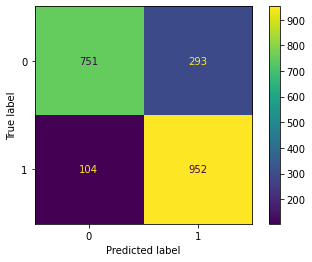

TPR: 0.878 
FPR: 0.235 




In [11]:
#Testing the linear Classifier on the training set itself without cross validation
model = LogisticRegression()
print("                                   Logistic Regression Model without K-fold cross validation ")
print("")
print("")
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
print("")
print("Accuracy Score: " + "{:.3f} %".format(metrics.accuracy_score(y_train, y_pred)*100))
print("Recall Score: " + "{:.3f} %".format(metrics.recall_score(y_train, y_pred)*100))
print("Precision Score: " + "{:.3f} %".format(metrics.precision_score(y_train, y_pred)*100))
print("F1 Score: " + "{:.3f} %".format(metrics.f1_score(y_train, y_pred)*100))
print("Area under ROC curve: " + "{:.3f} ".format(metrics.roc_auc_score(y_train, y_pred)))
print("Confusion Matrix:")
print("")
plot_confusion_matrix(model, X_train, y_train)  
plt.show()
CM = confusion_matrix(y_train, y_pred)
TN = CM[1][1]
FN = CM[1][0]
TP = CM[0][0]
FP = CM[0][1]
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("TPR: " + "{:.3f} ".format(TPR))
print("FPR: " + "{:.3f} ".format(FPR))
print("")
print("")

                                   Logistic Regression Model with train/test split 



Accuracy Score: 59.444 %
Recall Score: 56.081 %
Precision Score: 59.427 %
F1 Score: 57.706 %
Area under ROC curve: 0.594 
Confusion Matrix:



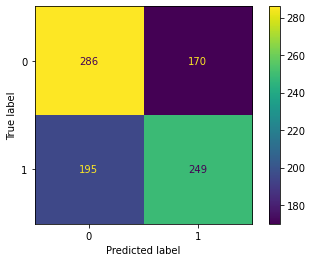

TPR: 0.595 
FPR: 0.406 




In [53]:
#Fitting the linear Classifier model on training data and applying to the testing data
model = LogisticRegression()
print("                                   Logistic Regression Model with train/test split ")
print("")
print("")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("")
print("Accuracy Score: " + "{:.3f} %".format(metrics.accuracy_score(y_test, y_pred)*100))
print("Recall Score: " + "{:.3f} %".format(metrics.recall_score(y_test, y_pred)*100))
print("Precision Score: " + "{:.3f} %".format(metrics.precision_score(y_test, y_pred)*100))
print("F1 Score: " + "{:.3f} %".format(metrics.f1_score(y_test, y_pred)*100))
print("Area under ROC curve: " + "{:.3f} ".format(metrics.roc_auc_score(y_test, y_pred)))
print("Confusion Matrix:")
print("")
plot_confusion_matrix(model, X_test, y_test)  
plt.show()
CM = confusion_matrix(y_test, y_pred)
TN = CM[1][1]
FN = CM[1][0]
TP = CM[0][0]
FP = CM[0][1]
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("TPR: " + "{:.3f} ".format(TPR))
print("FPR: " + "{:.3f} ".format(FPR))
print("")
print("")

From the above results we find out that the linear classifier performs poorly when subjected to a test data set, therefore the hypothesis is that the dataset has poor linear separability. Let us further confirm this hypothesis through the means of support vector machines and visualize the decision boundary.

In [84]:
#Testing for linear separability using only any one feature from the dataset
features = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit', 'sections']
model = LogisticRegression()
for f in features:
    X= ds[f]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy Score: " + "{:.3f} %".format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy Score: 79.778 %
Accuracy Score: 79.778 %
Accuracy Score: 79.778 %
Accuracy Score: 79.778 %
Accuracy Score: 79.778 %
Accuracy Score: 79.778 %
Accuracy Score: 79.778 %
Accuracy Score: 79.778 %
Accuracy Score: 79.778 %
Accuracy Score: 79.778 %
Accuracy Score: 79.778 %
Accuracy Score: 79.778 %
Accuracy Score: 79.778 %
Accuracy Score: 79.778 %


No handles with labels found to put in legend.


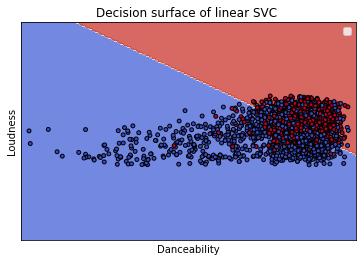

In [86]:
#Visualizing the decision boundary by plotting the support vectors to confirm Hypothesis
from sklearn.svm import SVC
from sklearn import svm, datasets

features = ["loudness", "danceability"]
X= ds[features]
X=np.array(X)
y=np.array(y)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='linear')
clf = model.fit(X, y)
fig, ax = plt.subplots()
title = ('Decision surface of linear SVC ')
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=15, edgecolors='k')
ax.set_ylabel('Loudness')
ax.set_xlabel('Danceability')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

From the scatter plot above we can see that the linear decision boundary formed is not competent enough to to classify the dataset and thus confirms our hypthosis. This means poor linear separability. A non-linear classifier such as a multi-layer perceptron model should work better on this particular dataset. Next we are going to test an Artificial Neural Network(MLP) on the dataset and observe the performance metrics. One hot encoding is applied to y and X is converted to numpy array format for less complexity in vector and matrix multiplication.

In [19]:
from sklearn.model_selection import train_test_split
# Shuffle the rows of dataset
ds = ds.sample(frac = 1)

#split dataset into X and Y
X = ds.iloc[: , [0,1,2,3,4,5,6,7,8,9,10,11,12,13]].copy()
y = ds.iloc[:, 14].copy()
X = np.array(X)
y = np.array(y)

enc = OneHotEncoder(sparse=False, categories='auto')
y = enc.fit_transform(y.reshape(len(y), -1))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
X

array([[ 0.447  ,  0.743  ,  0.     , ...,  4.     , 36.68032, 13.     ],
       [ 0.717  ,  0.385  , 10.     , ...,  4.     , 42.91333,  8.     ],
       [ 0.439  ,  0.753  ,  0.     , ...,  5.     , 36.11803, 12.     ],
       ...,
       [ 0.448  ,  0.784  ,  9.     , ...,  4.     , 49.79873,  7.     ],
       [ 0.603  ,  0.602  ,  6.     , ...,  5.     , 96.12728,  9.     ],
       [ 0.599  ,  0.887  ,  4.     , ...,  4.     , 31.83215,  7.     ]])

In [21]:
y

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

For the ANN the best parameters were found through the means of trial and error, and usage of keras tuner. Keras libraries(Tensorflow Backend) was used for the ANN implemetation. The network structure is 14-10-10-2, i.e. 14 input nodes as there are 14 attributes, 2 hidden layers with 10 neurons each and 2 nodes in the out put layer,  Relu activation is implemented in the hidden layers and softmax activation function in the output layer as this is a multiclassification task with 2 target classes (hit and flop). An adam optimizer is used to compute individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients therefore we do not need to provide a fixed learning rate value. The loss function used here is binary cross entropy, traditionally for categorical classification, categorical cross entropy is used, but note that the performance metric used is 'Categorical Accuracy' and not normal accuracy. The ANN is then initialized with 100 epochs as it was sufficient enough and to avoid over-fitting.

In [32]:
#Implementing a Multi-layer Perceptron model on the dataset
from keras.models import Sequential
from keras.layers import Dense
cvsscores=[]
model = Sequential()
model.add(Dense(10, activation = 'relu', input_dim = 14))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['categorical_accuracy'])
model.fit(X_train, y_train, batch_size = 10, epochs = 100)
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/100
210/210 [==============================] - 0s 778us/step - loss: 0.6354 - categorical_accuracy: 0.6690
Epoch 2/100
210/210 [==============================] - 0s 744us/step - loss: 0.5140 - categorical_accuracy: 0.7690
Epoch 3/100
210/210 [==============================] - 0s 701us/step - loss: 0.4654 - categorical_accuracy: 0.7838
Epoch 4/100
210/210 [==============================] - 0s 692us/step - loss: 0.4424 - categorical_accuracy: 0.7952
Epoch 5/100
210/210 [==============================] - 0s 706us/step - loss: 0.4270 - categorical_accuracy: 0.8114
Epoch 6/100
210/210 [==============================] - 0s 725us/step - loss: 0.4189 - categorical_accuracy: 0.8157
Epoch 7/100
210/210 [==============================] - 0s 692us/step - loss: 0.4128 - categorical_accuracy: 0.8171
Epoch 8/100
210/210 [==============================] - 0s 888us/step - loss: 0.4084 - categorical_accuracy: 0.8200
Epoch 9/100
210/210 [==============================] - 0s 754us/step - loss: 0.4

The non-linear classifier seemed to perform really well and again confirms our hypothesis that this dataset shows poor linear separability. A common misconception is that a dataset is either linear or non-linear in nature. But in reality no real world dataset will be 100% linearly separable, which means a non-linear classifier will always function optimally in most scenarios regarless of the linear classifiers performance on the same dataset.

## A comparative study between Pearson analysis and point-biserial analysis to find the correlation between continuous numerical values and dichotomous values, are they interchangeable or does one perform better than the other?

## Abstract:
In stage one we performed a correlation analysis to find a relationship between the input features and target variables, that is the independent and dependent variables. Since the dataset I chose had two classes, it became a binary classification problem. Therefore, I was curious if there is another method for correlation analysis that can be conducted. After doing some research I came across point-biserial correlation analysis.


## Introduction:
The Pearson’s correlation coefficient is a measure of linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus, it is essentially a normalised measurement of the covariance, such that the result always has a value between −1 and 1, where 1 signifies high positive correlation and -1 signifies high negative correlation. 0 signifies no correlation at all.


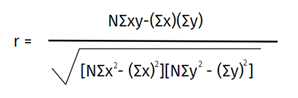

Where,

r = Pearson’s correlation coefficient

N = total number of samples

x = values of first set of data

y = values of second set of data

The point biserial correlation coefficient (rpb) is a correlation coefficient used when one variable is dichotomous. The point-biserial correlation is mathematically equivalent to the Pearson (product moment) correlation; that is, if we have one continuously measured variable x and a dichotomous variable y, rxy = rpb. This can be shown by assigning two distinct numerical values to the dichotomous variable. 
The mathematical formula for rpb is given as


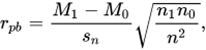

Let the n data consist of n 0>0 (x, 0) pairs and n 1>0 (x, 1) pairs. Their Pearson correlation coefficient will be the same as the reversed data consisting of corresponding (0, x) and (1, x) pairs. Because there are exactly two distinct values of the first coordinates, the regression line of the reversed data must pass through the mean points (0, M0) and (1, M1), whence it has slope (M1−M0)/ (1−0) =M1−M0. The correlation coefficient is obtained by standardizing this: it must be multiplied by the standard deviation of the first coordinates and divided by the standard deviation of the second coordinates (the original x values), written sn. The standard deviation of the first coordinates is readily computed from the fact that they consist of n0 zeros and n1 ones; it equals

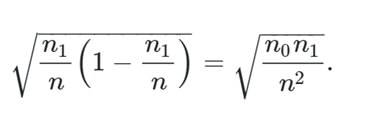

Consequently, the Pearson correlation coefficient is

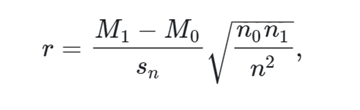

Which is precisely the formula for point-biserial coefficient.

Therefore, performing the Pearson correlation analysis between a continuous measured variable and dichotomous variable is mathematically equivalent to performing a point-biserial analysis between the two.


## Experiment:
The same dataset is used for this purpose as the previous stages, except only one feature is selected for X that is “loudness” and y will be used as it is, a 1-dimensional array containing the target classes “hit” or “flop”, that is values 1 or 0.
Libraries used in Jupyter Notebook: scipy, numpy


In [48]:
#X is a list of continuous values(loudness was selected in this case)
#y is a list of dichotmous values (the target classes hit or flop were selected containing values either 1 or 0)
from scipy.stats.stats import pearsonr,pointbiserialr
features = ["loudness"]
X= ds[features]
X=np.array(X,dtype=np.float)
X=X.flatten()
y=np.array(y,dtype=np.float)
y=y.flatten()

In [49]:
#calculating the pearson correlation and pvalue between the two given list of data
pearsonr(X, y)

(0.3328739223412888, 1.536525858535668e-78)

In [51]:
#calculating the the point biserial coefficient and pvalue for the same list of data
pointbiserialr(X, y)

PointbiserialrResult(correlation=0.3328739223412888, pvalue=1.536525858535668e-78)

## Conclusion:
By means of python libraries SciPy. Stats, the Pearson correlation analysis and point-biserial analysis were conducted on X and y. The correlation coefficients and p-values were identical and thus verifies the mathematical equivalency between the two. 
